In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get a list of all CSV files in the current directory
csv_files = [file for file in os.listdir('.') if file.endswith(".csv")] 


Feb_02_01_1498KOhm.csv
Feb_02_01_250KOhm.csv
Feb_02_01_510KOhm.csv
Feb_02_01_998KOhm.csv


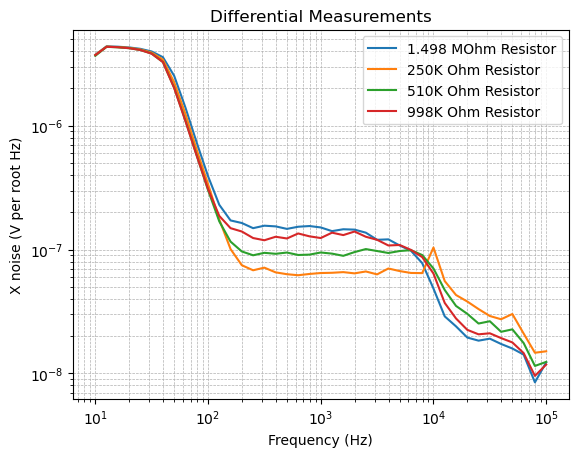

In [22]:
# Directly use the file name, as the files are in the current directory

avg_values = []
error = []

labels = ['1.498 MOhm Resistor','250K Ohm Resistor','510K Ohm Resistor','998K Ohm Resistor']
i = 0

# Loop through each CSV file and plot the data
for file in csv_files:
    # Directly use the file name
    df = pd.read_csv(file)
    x_values = df['Frequency (Hz) - Plot 0']
    y_values = df['X noise (V per root Hz) - Plot 0']
    print(file)

    avg_values.append(np.mean(y_values[13:22]))
    error.append(np.std(y_values[13:22]))

    plt.loglog(x_values, y_values, label=labels[i])
    i += 1

plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Differential Measurements')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

#plt.xlim(200, 1000)
plt.show()
    

In [10]:
avg_values = np.array(avg_values)
avg_values = np.sort(avg_values)

resistances = [250*10**3,510*10**3,998*10**3,1498*10**3]

print(error)

[6.051221690751157e-09, 3.957396575315769e-09, 2.099617837066641e-09, 6.751314458205918e-09]


Slope of the line: 1.5089193265071996e-20


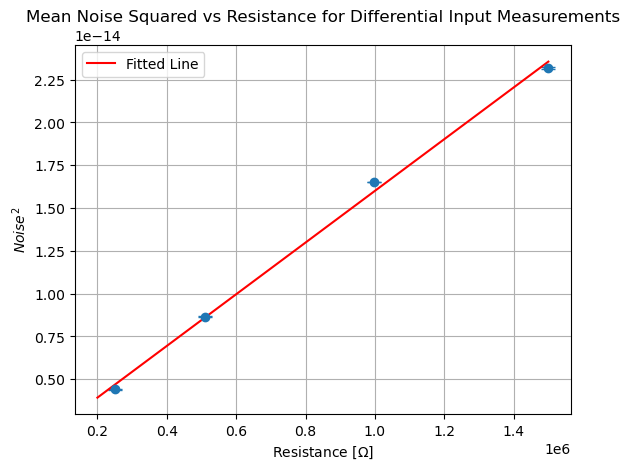

In [11]:
avg_squared = avg_values**2

# Fit a linear regression line (1st-degree polynomial)
coefficients = np.polyfit(resistances, avg_squared, 1)

# The first coefficient represents the slope of the line
slope = coefficients[0]

print("Slope of the line:", slope)

x = np.linspace(200*10**3,1500*10**3)
# Generate predicted values for the fitted line
predicted_y = np.polyval(coefficients, x)

# Plot the data points and the fitted line

plt.errorbar(resistances, avg_squared, yerr=np.power(error,2), fmt='o', capsize=5)
plt.plot(x, predicted_y, label='Fitted Line', color='red')
plt.xlabel('Resistance [$\Omega$]')
plt.ylabel('$Noise^2$')
plt.legend()
plt.grid(True)
plt.title('Mean Noise Squared vs Resistance for Differential Input Measurements')
plt.show()

In [12]:
four_k_t_measured = slope
four_k_t_actual = 4*1.38*10**-23*295.5

percent_error = np.abs((four_k_t_measured - four_k_t_actual) / four_k_t_actual) * 100
print(percent_error)

7.494094600946583
